<a href="https://colab.research.google.com/github/denisbebrovich/ML-DS/blob/main/%D0%9C%D0%9E%D0%B4%D0%B77.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#импорт библиотек

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# открываем файл

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/glassdor_norm.csv', delimiter = ',')
df = df.drop(columns = ['day',	'month'])
df

,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,year,overall
0,0.371667,-0.602106,-1.060046,-0.548583,-0.134175,-1.126001,-1.523631,-0.180489,-1.125080,2
1,-0.435397,-1.757818,-1.060046,-1.876647,0.599324,-1.126001,-1.523631,-0.180489,-1.125080,2
2,-1.765328,-1.757818,-1.737748,-1.876647,-1.601212,-1.126001,-1.523631,-1.054130,-0.742651,1
3,-1.157151,-0.602106,-1.060046,-1.287863,-0.134175,-1.126001,-1.523631,-0.180489,-0.742651,5
4,-1.157151,-1.757818,-1.060046,-1.876647,-1.601212,-1.126001,-1.523631,-1.054130,-0.742651,1
...,...,...,...,...,...,...,...,...,...,...
78147,0.371667,1.097816,-0.315610,-0.548583,-0.134175,0.762872,0.950898,-0.180489,-1.820608,4
78148,1.248749,0.189624,-1.060046,0.309266,-0.867685,-1.126001,-0.036809,-0.180489,-1.820608,2
78149,-0.435397,-1.260705,0.475768,0.309266,-0.134175,-1.126001,0.950898,-0.180489,-1.820608,3
78150,-0.435397,0.189624,-0.315610,0.309266,0.599324,0.762872,0.950898,-0.180489,-1.820608,4


Предварительная обработка в [дз3](https://colab.research.google.com/drive/1eN_zIT-n-U6eux_kkbfc7QGee0evj1KN?usp=sharing)


In [ ]:
df.describe()

,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,year,overall
count,7.815200e+04,7.815200e+04,7.815200e+04,7.815200e+04,7.815200e+04,7.815200e+04,7.815200e+04,7.815200e+04,7.815200e+04,78152.000000
mean,-1.691076e-16,9.164539e-17,1.091017e-16,-8.146257e-17,-9.600946e-17,5.673286e-17,4.640457e-16,-1.658345e-16,1.949283e-16,3.643682
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.226604
min,-1.765328e+00,-1.757818e+00,-1.737748e+00,-1.876647e+00,-1.601212e+00,-1.631301e+00,-1.523631e+00,-1.653751e+00,-2.117744e+00,1.000000
25%,-4.353971e-01,-6.021063e-01,-1.060046e+00,-5.485832e-01,-8.676853e-01,-1.126001e+00,-8.738161e-01,-1.054130e+00,-7.426515e-01,3.000000
50%,3.716673e-01,1.896241e-01,-3.156103e-01,3.092658e-01,-1.341752e-01,7.628721e-01,-3.680870e-02,-1.804888e-01,7.344475e-02,4.000000
75%,1.248749e+00,1.097816e+00,4.757679e-01,1.267658e+00,5.993238e-01,7.628721e-01,9.508982e-01,9.379142e-01,9.449225e-01,5.000000
max,1.248749e+00,1.097816e+00,1.303992e+00,1.267658e+00,1.332815e+00,7.628721e-01,9.508982e-01,9.379142e-01,1.398165e+00,5.000000


#Модель

In [ ]:
X = df.iloc[:, : -1]
Y = df.iloc[:, -1:]

In [ ]:
X

,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,year
0,0.371667,-0.602106,-1.060046,-0.548583,-0.134175,-1.126001,-1.523631,-0.180489,-1.125080
1,-0.435397,-1.757818,-1.060046,-1.876647,0.599324,-1.126001,-1.523631,-0.180489,-1.125080
2,-1.765328,-1.757818,-1.737748,-1.876647,-1.601212,-1.126001,-1.523631,-1.054130,-0.742651
3,-1.157151,-0.602106,-1.060046,-1.287863,-0.134175,-1.126001,-1.523631,-0.180489,-0.742651
4,-1.157151,-1.757818,-1.060046,-1.876647,-1.601212,-1.126001,-1.523631,-1.054130,-0.742651
...,...,...,...,...,...,...,...,...,...
78147,0.371667,1.097816,-0.315610,-0.548583,-0.134175,0.762872,0.950898,-0.180489,-1.820608
78148,1.248749,0.189624,-1.060046,0.309266,-0.867685,-1.126001,-0.036809,-0.180489,-1.820608
78149,-0.435397,-1.260705,0.475768,0.309266,-0.134175,-1.126001,0.950898,-0.180489,-1.820608
78150,-0.435397,0.189624,-0.315610,0.309266,0.599324,0.762872,0.950898,-0.180489,-1.820608


In [ ]:
Y

,overall
0,2
1,2
2,1
3,5
4,1
...,...
78147,4
78148,2
78149,3
78150,4


In [ ]:
trainX, testX, trainY, testY = train_test_split(X, Y, train_size=0.8, test_size = 0.2, random_state = 42)
trainX

,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,year
76545,-1.765328,-0.602106,0.475768,0.309266,-1.601212,-1.126001,-0.873816,-1.054130,1.398165
74631,-0.435397,1.097816,-0.315610,-1.287863,-1.601212,-1.631301,-1.523631,-1.653751,-0.342353
32156,-0.435397,1.097816,-0.315610,1.267658,0.599324,0.762872,0.950898,0.937914,0.073445
35066,1.248749,0.189624,1.303992,1.267658,0.599324,0.762872,-1.523631,-1.653751,0.944922
53409,-0.435397,0.189624,-0.315610,-0.548583,-0.134175,0.762872,-0.036809,0.937914,-0.342353
...,...,...,...,...,...,...,...,...,...
6265,-1.157151,-0.602106,0.475768,-1.287863,-0.134175,-1.631301,-1.523631,-0.180489,-0.742651
54886,1.248749,1.097816,0.475768,-0.548583,-0.134175,0.762872,0.950898,0.937914,0.502988
76820,-1.765328,-0.602106,-1.060046,-0.548583,0.599324,-1.126001,-0.036809,-0.180489,-1.125080
860,0.371667,-1.260705,-1.737748,-1.876647,-0.134175,-1.126001,-0.036809,-1.054130,1.398165


In [ ]:
trainY

,overall
76545,4
74631,3
32156,5
35066,5
53409,3
...,...
6265,2
54886,5
76820,4
860,2


In [ ]:
model = DecisionTreeClassifier()
model.fit(trainX, trainY)
predictions = model.predict(testX)
pred_df = pd.DataFrame(predictions)
pred_df

,0
0,3
1,4
2,5
3,4
4,1
...,...
15626,5
15627,4
15628,5
15629,5


In [ ]:
features = X.columns

оцениваем важность каждой фичи

In [ ]:
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame(feature_importance).T
feature_importance_df.columns = features
feature_importance_df

,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,year
0,0.086745,0.28435,0.159936,0.067708,0.066287,0.047802,0.073297,0.062098,0.151775


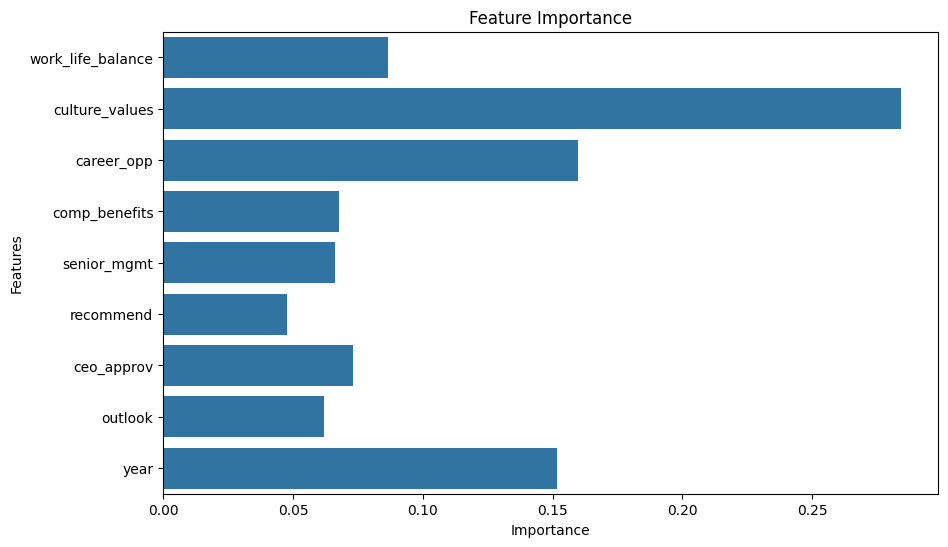

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [ ]:
cv_scores = cross_val_score(model, X, Y, cv=10, scoring = 'accuracy')  # 10-кратная кросс-валидация
print(f'Кросс-валидация (точность): {cv_scores}')

Кросс-валидация (точность): [0.57906858 0.59877175 0.57747921 0.5371721  0.56634677 0.60524632
 0.58746001 0.59283429 0.62827895 0.57056942]


наилучший результат - 0.63

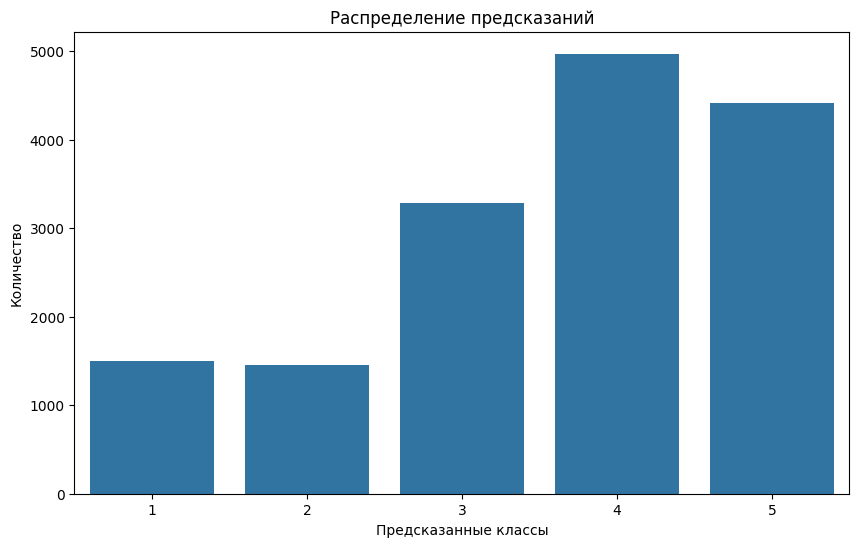

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=predictions)
plt.title('Распределение предсказаний')
plt.xlabel('Предсказанные классы')
plt.ylabel('Количество')
plt.xticks()
plt.show()

#Новые признаки

добавим кластеризацию

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
X_new = X
X_new['cluster'] = kmeans.fit_predict(X)
X_new

,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,year,cluster
0,0.371667,-0.602106,-1.060046,-0.548583,-0.134175,-1.126001,-1.523631,-0.180489,-1.125080,1
1,-0.435397,-1.757818,-1.060046,-1.876647,0.599324,-1.126001,-1.523631,-0.180489,-1.125080,1
2,-1.765328,-1.757818,-1.737748,-1.876647,-1.601212,-1.126001,-1.523631,-1.054130,-0.742651,1
3,-1.157151,-0.602106,-1.060046,-1.287863,-0.134175,-1.126001,-1.523631,-0.180489,-0.742651,1
4,-1.157151,-1.757818,-1.060046,-1.876647,-1.601212,-1.126001,-1.523631,-1.054130,-0.742651,1
...,...,...,...,...,...,...,...,...,...,...
78147,0.371667,1.097816,-0.315610,-0.548583,-0.134175,0.762872,0.950898,-0.180489,-1.820608,2
78148,1.248749,0.189624,-1.060046,0.309266,-0.867685,-1.126001,-0.036809,-0.180489,-1.820608,2
78149,-0.435397,-1.260705,0.475768,0.309266,-0.134175,-1.126001,0.950898,-0.180489,-1.820608,2
78150,-0.435397,0.189624,-0.315610,0.309266,0.599324,0.762872,0.950898,-0.180489,-1.820608,2


In [ ]:
trainX_new, testX_new, trainY_new, testY_new = train_test_split(X_new, Y, train_size=0.8, test_size = 0.2, random_state = 42)
trainX_new

,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,year,cluster
76545,-1.765328,-0.602106,0.475768,0.309266,-1.601212,-1.126001,-0.873816,-1.054130,1.398165,1
74631,-0.435397,1.097816,-0.315610,-1.287863,-1.601212,-1.631301,-1.523631,-1.653751,-0.342353,4
32156,-0.435397,1.097816,-0.315610,1.267658,0.599324,0.762872,0.950898,0.937914,0.073445,0
35066,1.248749,0.189624,1.303992,1.267658,0.599324,0.762872,-1.523631,-1.653751,0.944922,4
53409,-0.435397,0.189624,-0.315610,-0.548583,-0.134175,0.762872,-0.036809,0.937914,-0.342353,2
...,...,...,...,...,...,...,...,...,...,...
6265,-1.157151,-0.602106,0.475768,-1.287863,-0.134175,-1.631301,-1.523631,-0.180489,-0.742651,1
54886,1.248749,1.097816,0.475768,-0.548583,-0.134175,0.762872,0.950898,0.937914,0.502988,0
76820,-1.765328,-0.602106,-1.060046,-0.548583,0.599324,-1.126001,-0.036809,-0.180489,-1.125080,1
860,0.371667,-1.260705,-1.737748,-1.876647,-0.134175,-1.126001,-0.036809,-1.054130,1.398165,1


In [ ]:
model_new = DecisionTreeClassifier()
model_new.fit(trainX_new, trainY_new)
predictions_new = model_new.predict(testX_new)
pred_df_new = pd.DataFrame(predictions_new)
pred_df_new

,0
0,3
1,4
2,5
3,4
4,3
...,...
15626,5
15627,3
15628,5
15629,5


In [ ]:
param_grid_dt = {
    'decision_tree__max_depth': [None, 5, 10, 15],
    'decision_tree__min_samples_split': [2, 5, 10],
    'decision_tree__min_samples_leaf': [1, 2, 4]
}

# 4. Создание пайплайна для дерева решений
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),  # Масштабирование
    ('decision_tree', DecisionTreeClassifier(random_state=42))
])

# 5. Оптимизация дерева решений с GridSearchCV
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, n_jobs=-1)
grid_search_dt.fit(trainX_new, trainY_new)

# 6. Вывод результатов для дерева решений
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_
print(f'Лучшие параметры для дерева решений: {best_params_dt}')
print(f'Лучший средний балл (точность): {best_score_dt:.4f}')

Лучшие параметры для дерева решений: {'decision_tree__max_depth': 10, 'decision_tree__min_samples_leaf': 2, 'decision_tree__min_samples_split': 10}
Лучший средний балл (точность): 0.6570


In [ ]:
# 7. Оценка модели на тестовых данных
best_model_dt = grid_search_dt.best_estimator_
test_predictions_dt = best_model_dt.predict(testX_new)
print(classification_report(testY_new, test_predictions_dt))

              precision    recall  f1-score   support

           1       0.71      0.73      0.72      1298
           2       0.47      0.48      0.47      1435
           3       0.58      0.55      0.57      3323
           4       0.62      0.69      0.65      5007
           5       0.80      0.72      0.76      4568

    accuracy                           0.65     15631
   macro avg       0.64      0.63      0.63     15631
weighted avg       0.66      0.65      0.65     15631



In [ ]:
testy = testY_new.to_numpy().ravel()

In [ ]:
results_df = pd.DataFrame({
    'Actual': testy,
    'Predicted': test_predictions_dt})
results_df

,Actual,Predicted
0,3,3
1,3,4
2,4,5
3,5,5
4,3,2
...,...,...
15626,4,5
15627,4,4
15628,4,4
15629,5,5


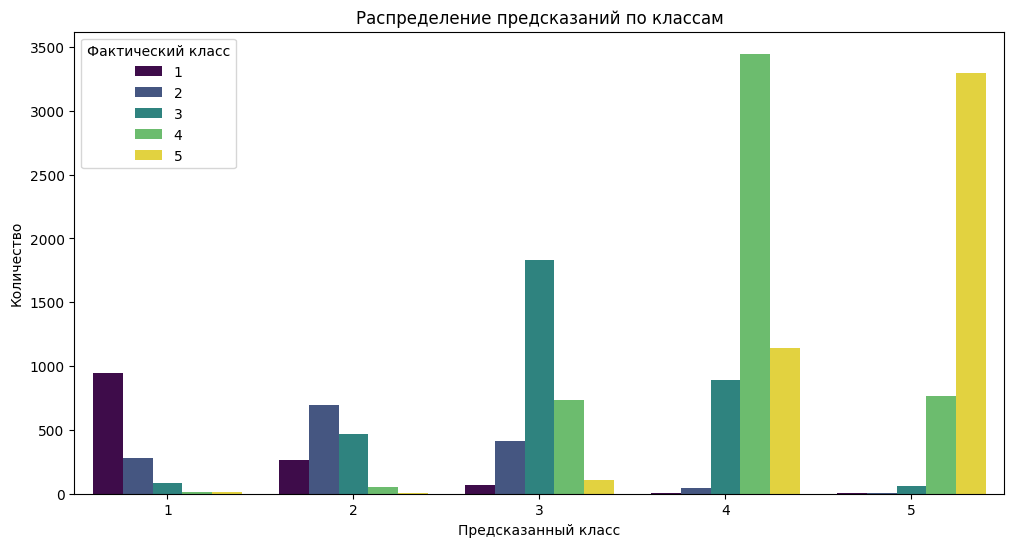

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=results_df, x='Predicted', hue='Actual', palette='viridis')
plt.title('Распределение предсказаний по классам')
plt.xlabel('Предсказанный класс')
plt.ylabel('Количество')
plt.legend(title='Фактический класс')
plt.show()


In [ ]:
testY_new

,overall
72332,3
45787,3
37127,4
45672,5
9451,3
...,...
54998,4
54372,4
40861,4
33767,5


In [ ]:
data = pd.concat([testX_new, testY_new], axis=1)
data

,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,year,cluster,overall
72332,-1.157151,-1.260705,-0.315610,-1.287863,-0.867685,0.762872,-0.036809,-0.180489,0.944922,3,3
45787,0.371667,0.189624,1.303992,-1.287863,-0.134175,0.762872,0.950898,-0.180489,-0.342353,2,3
37127,1.248749,0.189624,1.303992,1.267658,1.332815,0.762872,0.950898,0.937914,1.398165,0,4
45672,1.248749,1.097816,1.303992,-0.548583,0.599324,0.762872,0.950898,0.937914,-0.342353,0,5
9451,-1.157151,-0.602106,-1.060046,-0.548583,-1.601212,-1.126001,0.950898,-1.054130,-0.342353,1,3
...,...,...,...,...,...,...,...,...,...,...,...
54998,1.248749,1.097816,1.303992,1.267658,1.332815,0.762872,0.950898,0.937914,0.502988,0,4
54372,0.371667,-0.602106,-0.315610,0.309266,-0.134175,0.762872,-0.873816,-0.180489,0.073445,3,4
40861,1.248749,0.189624,0.475768,0.309266,0.599324,-1.631301,-1.523631,-1.653751,0.502988,4,4
33767,1.248749,1.097816,1.303992,1.267658,1.332815,0.762872,0.950898,-1.653751,0.502988,0,5


In [ ]:
corMat = data.corr()
targetCor = corMat['overall'].to_frame(name='overallCorr')
targetCor = targetCor.sort_values(by = 'overallCorr', ascending = False, key = abs)
targetCor.style.background_gradient(vmin=-1, vmax=1)

,overallCorr
overall,1.000000
culture_values,0.774436
senior_mgmt,0.760993
career_opp,0.730126
comp_benefits,0.617869
recommend,0.565920
work_life_balance,0.565172
outlook,0.424551
ceo_approv,0.303768
year,0.108898
